<a href="https://colab.research.google.com/github/soumalyapal03/SPAM-TEXT-CLASSIFICATION/blob/main/spam_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('spam.tsv', sep='\t')

In [8]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [9]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [10]:
len(df)

5572

In [11]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [12]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [13]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [14]:
data = pd.concat([ham, spam], ignore_index=True)
print(data.head())

  label                                            message  length  punct
0   ham  Go until jurong point, crazy.. Available only ...     111      9
1   ham                      Ok lar... Joking wif u oni...      29      6
2   ham  U dun say so early hor... U c already then say...      49      6
3   ham  Nah I don't think he goes to usf, he lives aro...      61      2
4   ham  Even my brother is not like to speak with me. ...      77      2


In [15]:
data = pd.concat([ham,spam], ignore_index=True)
print(data.head())

  label                                            message  length  punct
0   ham  Go until jurong point, crazy.. Available only ...     111      9
1   ham                      Ok lar... Joking wif u oni...      29      6
2   ham  U dun say so early hor... U c already then say...      49      6
3   ham  Nah I don't think he goes to usf, he lives aro...      61      2
4   ham  Even my brother is not like to speak with me. ...      77      2


In [16]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [17]:
print(ham.shape)
print(spam.shape)

(4825, 4)
(747, 4)


In [18]:
if ham.shape[0] > 0 and spam.shape[0] > 0:
    ham = ham.sample(spam.shape[0])
else:
    print("One of the DataFrames is empty, cannot sample.")

In [19]:
data = pd.concat([ham,spam] ,ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


In [20]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [21]:
ham.shape, spam.shape

((747, 4), (747, 4))

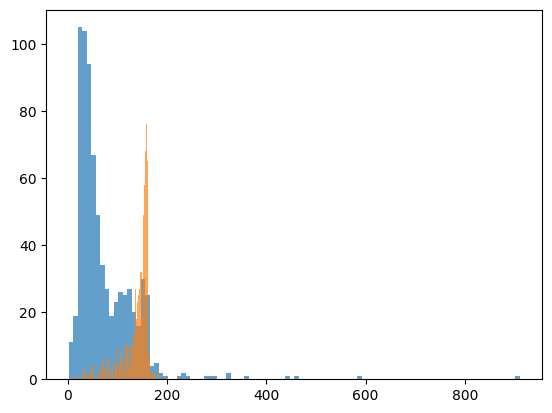

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
plt.hist(data[data['label']=='ham']['length'],bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['length'],bins = 100, alpha = 0.7)
plt.show()


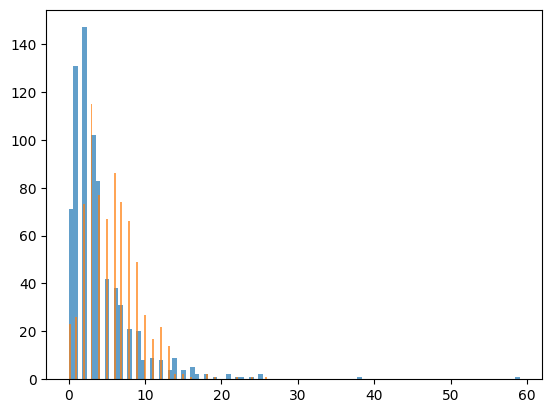

In [23]:
plt.hist(data[data['label']=='ham']['punct'],bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['punct'],bins = 100, alpha = 0.7)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
data.head()

,label,message,length,punct
0,ham,Good morning princess! Have a great day!,40,2
1,ham,"Haha awesome, be there in a minute",34,1
2,ham,I am not sure about night menu. . . I know onl...,63,3
3,ham,This is wishing you a great day. Moji told me ...,237,6
4,ham,(You didn't hear it from me),28,3


In [38]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state=0, shuffle = True, stratify=data['label'] )

In [28]:
X_train

1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742     Very hurting n meaningful lines ever: "I compr...
477     Haha figures, well I found the piece and prisc...
542                 Yo come over carlos will be here soon
1277    Ringtone Club: Gr8 new polys direct to your mo...
                              ...                        
1211    Bloomberg -Message center +447797706009 Why wa...
312     I hope you that's the result of being consiste...
268                                    At home by the way
272            I'll text carlos and let you know, hang on
1222    Text BANNEDUK to 89555 to see! cost 150p texto...
Name: message, Length: 1045, dtype: object

In [29]:
y_train

1128    spam
742      ham
477      ham
542      ham
1277    spam
        ... 
1211    spam
312      ham
268      ham
272      ham
1222    spam
Name: label, Length: 1045, dtype: object

In [30]:
### bag of words creation

In [31]:
vectorizer = TfidfVectorizer()

In [32]:
X_train = vectorizer.fit_transform(X_train)

In [33]:
X_train.shape

(1045, 3712)

In [34]:
X_train


<1045x3712 sparse matrix of type '<class 'numpy.float64'>'
	with 17866 stored elements in Compressed Sparse Row format>

In [35]:
1045*3708

3874860

In [36]:
clf = Pipeline([('tfid', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [39]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [40]:
y_pred = clf.predict(X_test)

In [41]:
confusion_matrix(y_test, y_pred)

array([[224,   1],
       [ 26, 198]])

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.94       225
        spam       0.99      0.88      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [43]:
accuracy_score(y_test, y_pred)

0.9398663697104677

In [44]:
clf.predict(["Hey,whatsup"])

array(['ham'], dtype=object)

In [45]:
clf.predict(['congratulations! you have won the free tickets to USA!'])

array(['spam'], dtype=object)

In [ ]:
###SVM

In [48]:
clf = Pipeline([('tfid', TfidfVectorizer()), ('clf', SVC(C = 100, gamma = 'auto'))])

In [49]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', SVC(C=100, gamma='auto'))])

In [50]:
y_pred = clf.predict(X_test)

In [51]:
confusion_matrix(y_test, y_pred)

array([[222,   3],
       [ 34, 190]])

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92       225
        spam       0.98      0.85      0.91       224

    accuracy                           0.92       449
   macro avg       0.93      0.92      0.92       449
weighted avg       0.93      0.92      0.92       449



In [53]:
accuracy_score(y_test, y_pred)

0.9175946547884187

In [54]:
clf.predict(["Hey,whatsup"])

array(['ham'], dtype=object)

In [55]:
clf.predict(['congratulations! you have won the free tickets to USA!'])

array(['spam'], dtype=object)